In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

---

## Знакомство

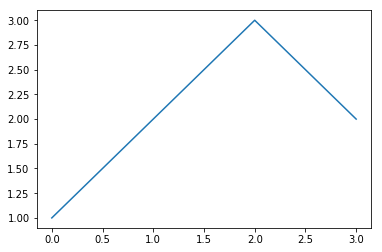

In [3]:
plt.plot([1,2,3,2])

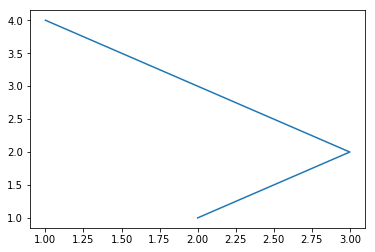

In [4]:
plt.plot([1,2,3,2], [4,3,2,1])

(array([2., 1., 0., 4., 0., 2., 1., 0., 1., 1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

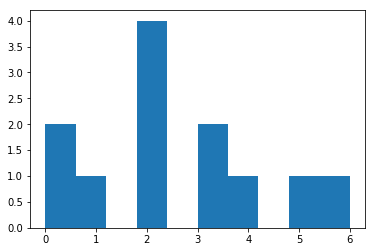

In [5]:
plt.hist(
    [0,0,1,2,2,2,2,3,3,4,5,6]
)

---

## Сбербанк
https://www.kaggle.com/c/sberbank-russian-housing-market

In [6]:
df = pd.read_csv('00_sberbank_macro.csv')

In [7]:
!cat data_dictionary.txt

cat: data_dictionary.txt: No such file or directory


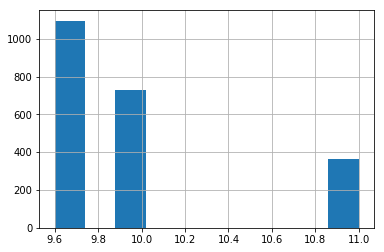

In [8]:
df[~df['mortality'].isnull()]['mortality'].hist()

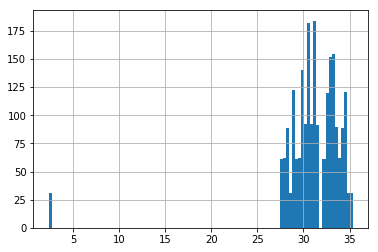

In [9]:
df['rent_price_1room_eco'].hist(bins=100)

In [10]:
tmp = df[[
    'timestamp', 'oil_urals', 'gdp_quart_growth'
]]

In [11]:
tmp['timestamp'] = pd.to_datetime(tmp['timestamp'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


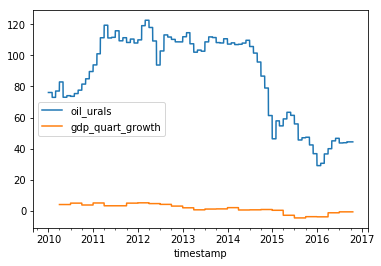

In [12]:
tmp.set_index('timestamp').plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1166e12b0>,
      dtype=object)

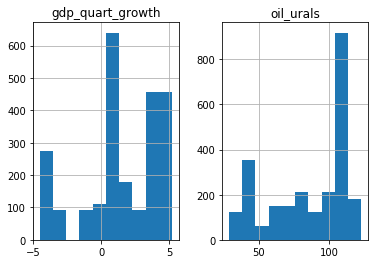

In [13]:
tmp.hist()

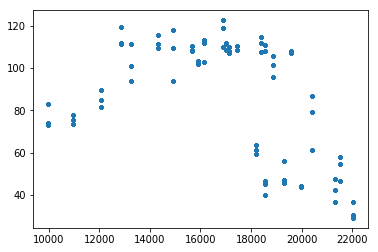

In [14]:
plt.plot(
    df[~df['gdp_quart'].isnull()]['gdp_quart'],
    df[~df['gdp_quart'].isnull()]['oil_urals'],
    '.'
)

---

## Вернемся к титанику

In [15]:
df = pd.read_csv('00_titanic_train.csv')

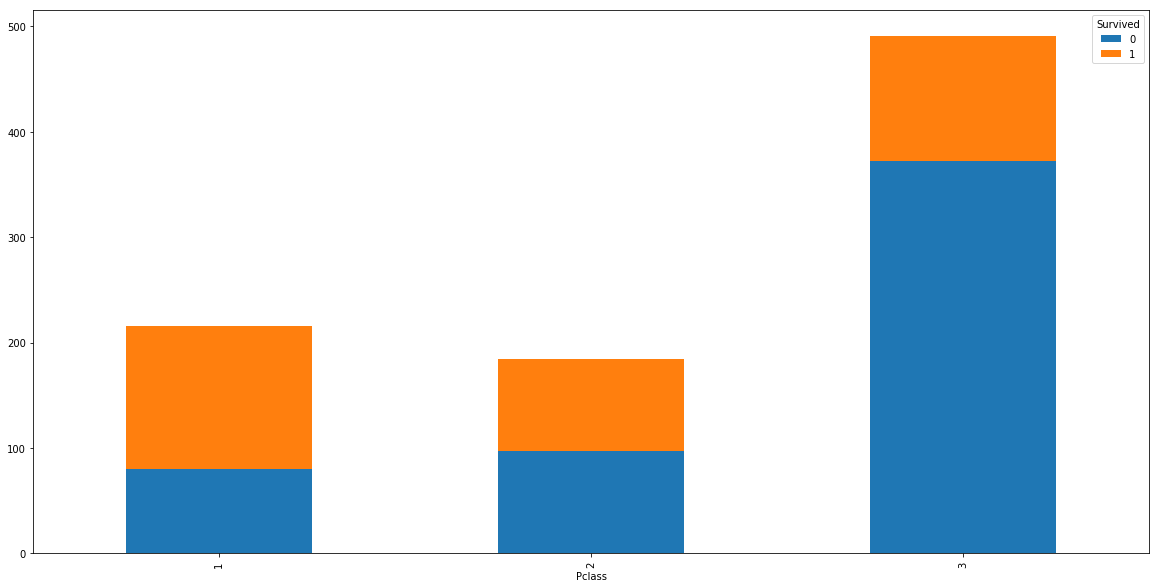

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
df.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True, ax=ax)

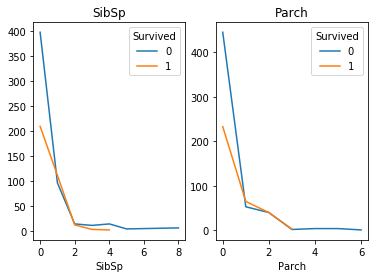

In [18]:
fig, axes = plt.subplots(ncols=2)
df.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
df.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')

In [19]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [20]:
df['Age'] = df['Age'].fillna(-1)

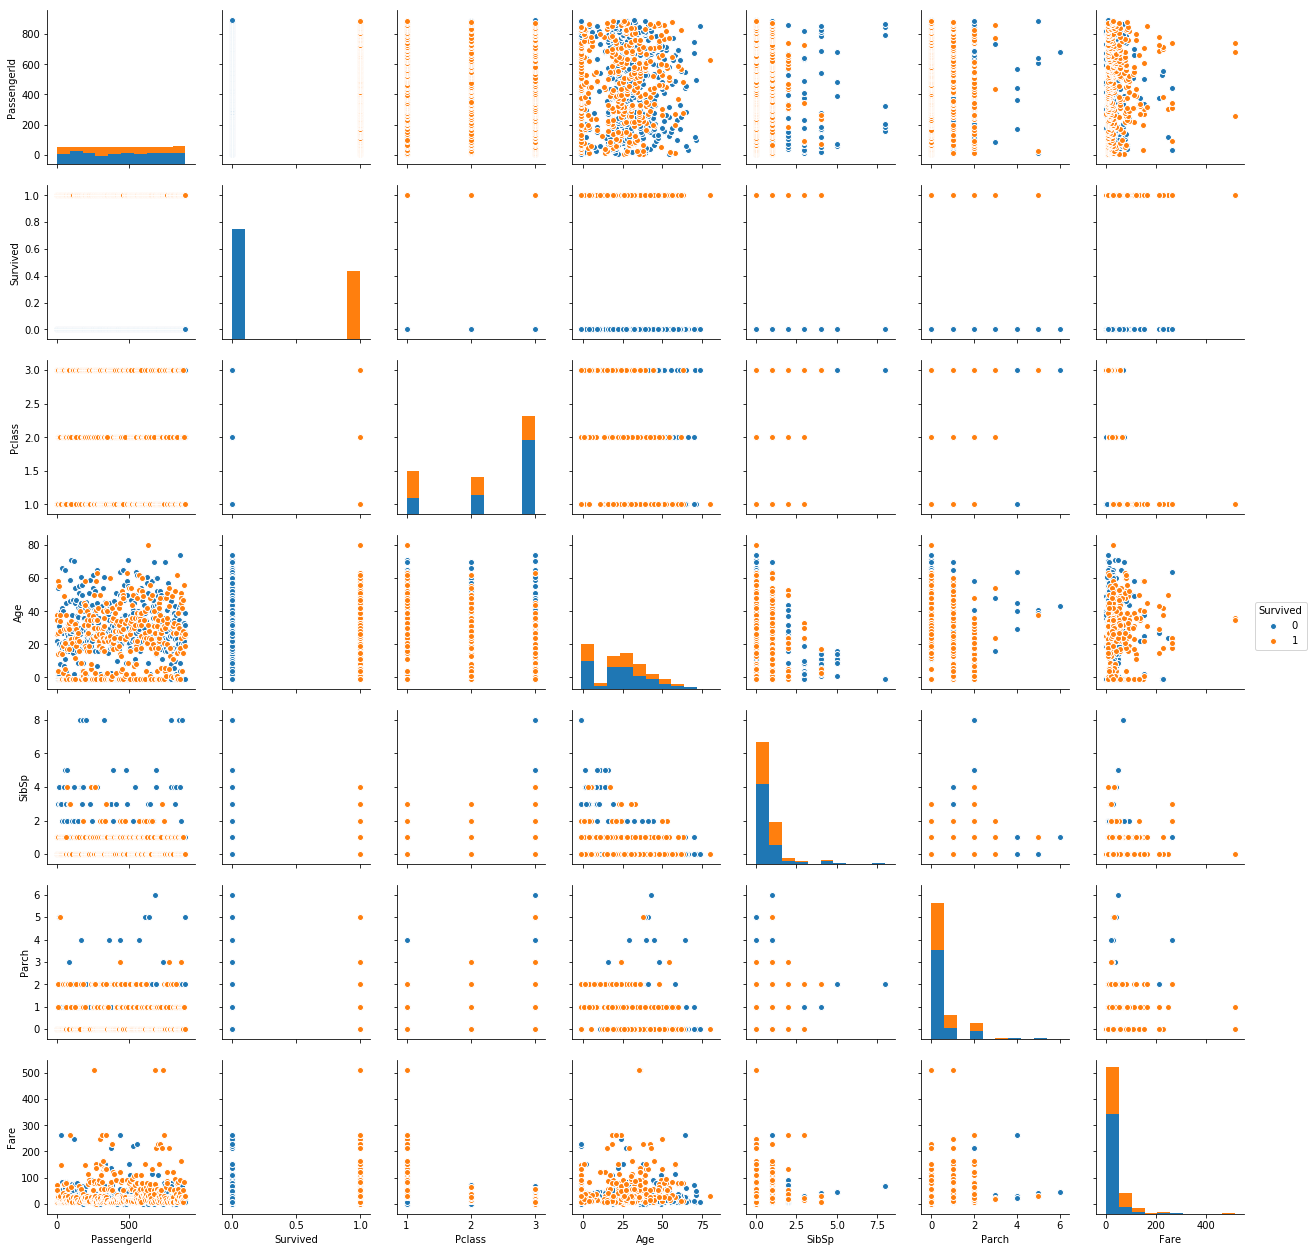

In [21]:
sns.pairplot(df, hue='Survived')